Credits/Course URL: https://www.udemy.com/course/customer-analytics-in-python/

# Customer Segmentation Analysis Project

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [4]:
cust_data = pd.read_csv(r'E:\Github\Datasets\segmentation_data.csv', index_col=0)

In [5]:
cust_data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [6]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [7]:
cust_data.describeibe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


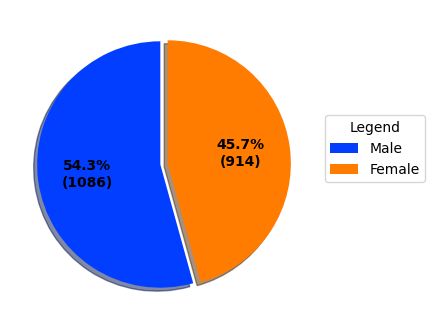

In [13]:
fig, ax = plt.subplots(figsize=[12,4])

sex_count = cust_data['Sex'].value_counts()

labels = ['Male', 'Female']
data = sex_count.values
title = "Male vs Female Distribution"
colors = sns.color_palette('bright')[0:10]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

wedges, texts, autopcts = ax.pie(x= data, 
                                 autopct=lambda pct: func(pct, data), 
                                 explode=[0.03]*len(data), 
                                 shadow=True, 
                                 startangle = 90,
                                 colors = colors,
                                 radius=1
                                 )
# Adding legend
ax.legend(wedges, labels,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 1, 0.1))

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize':10});

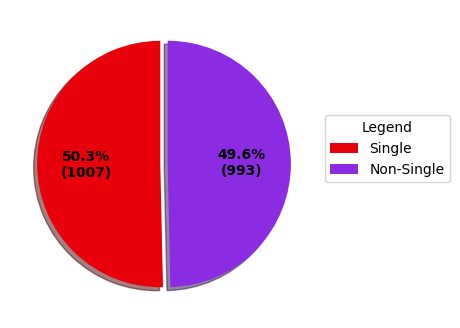

In [15]:
fig, ax = plt.subplots(figsize=[12,4])

marital_status_count = cust_data['Marital status'].value_counts()

labels = ['Single', 'Non-Single']
data = marital_status_count.values
title = "Marital Status Distribution"
colors = sns.color_palette('bright')[3:10]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

wedges, texts, autopcts = ax.pie(x= data, 
                                 autopct=lambda pct: func(pct, data), 
                                 explode=[0.03]*len(data), 
                                 shadow=True, 
                                 startangle = 90,
                                 colors = colors,
                                 radius=1
                                 )
# Adding legend
ax.legend(wedges, labels,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 1, 0.1))

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize':10});

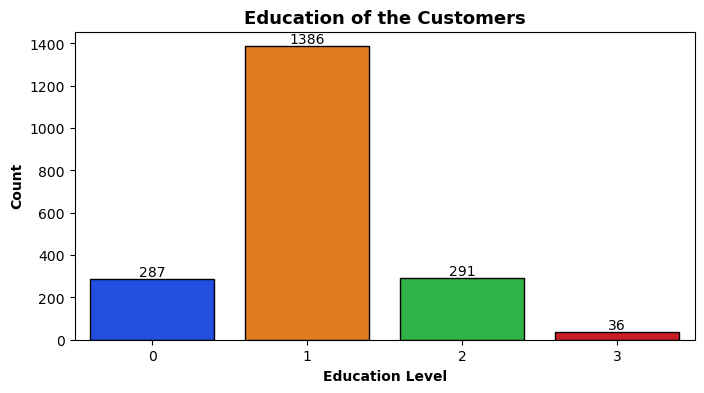

In [18]:
edu_counts = cust_data['Education'].value_counts()

plt.figure(figsize=(8,4))
ax = sns.barplot(x = edu_counts.index, y = edu_counts.values, palette = "bright", edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title('Education of the Customers', fontsize = 13, fontweight="bold")
plt.xlabel('Education Level', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

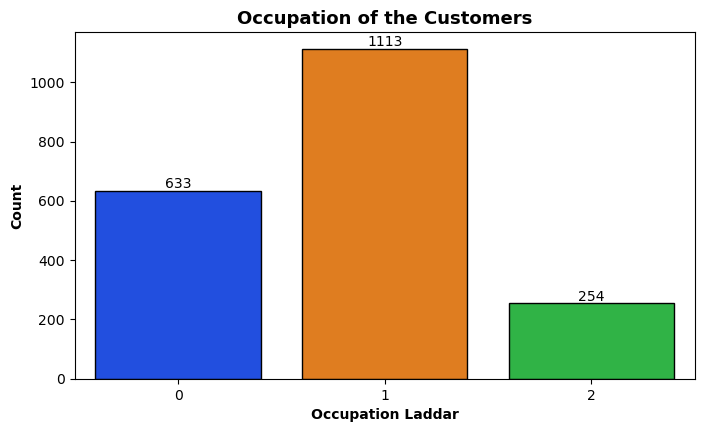

In [20]:
occupation_counts = cust_data['Occupation'].value_counts()

plt.figure(figsize=(8,4.5))
ax = sns.barplot(x = occupation_counts.index, y = occupation_counts.values, palette = "bright", edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title('Occupation of the Customers', fontsize = 13, fontweight="bold")
plt.xlabel('Occupation Laddar', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

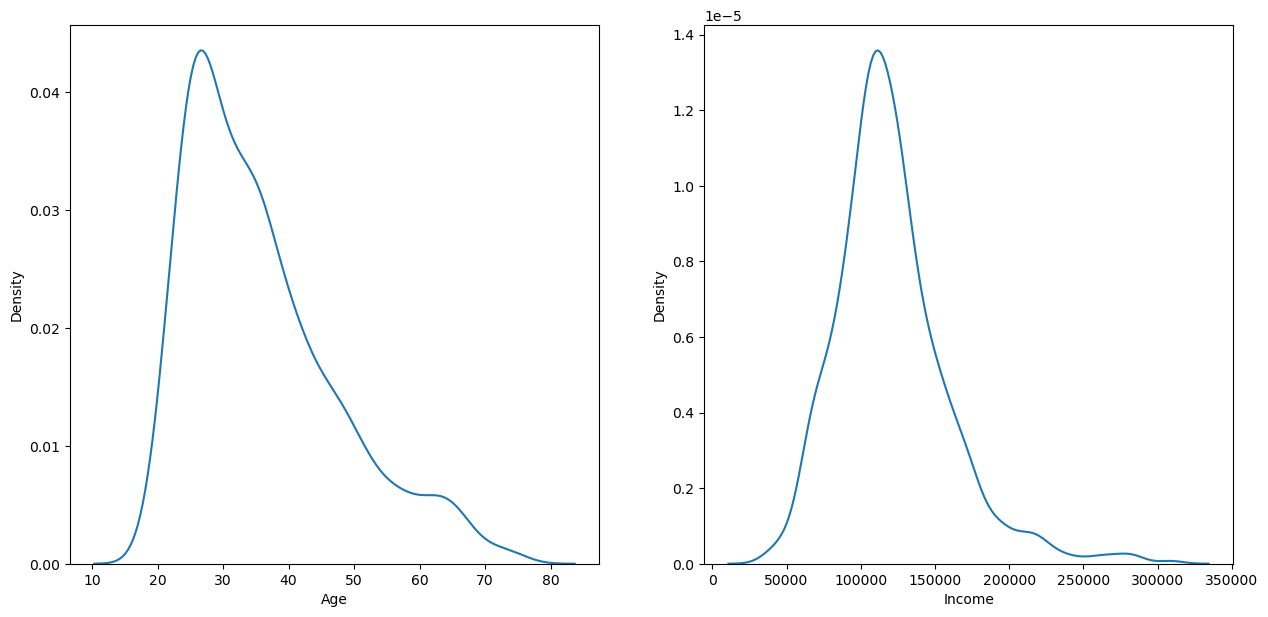

In [22]:
cols = ['Age', 'Income']

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
for i in range(2):
    sns.kdeplot(ax=axes[i], data = cust_data, x = cols[i])

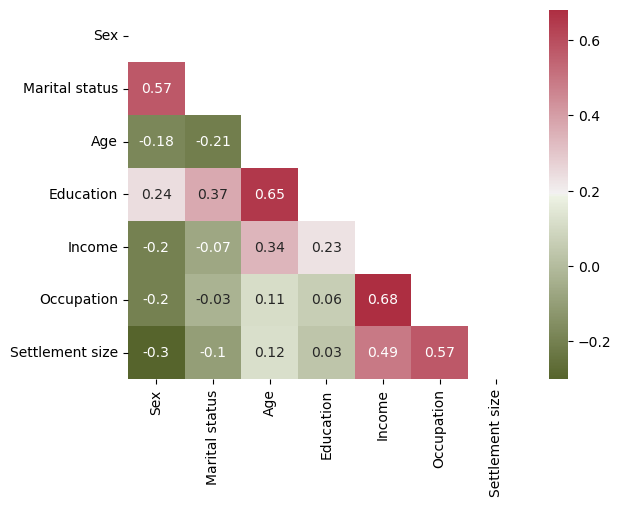

In [23]:
corr_data = cust_data.corr().round(2)

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr_data))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

# using the upper triangle matrix as mask 
sns.heatmap(corr_data, annot=True, mask=matrix, cmap=cmap);

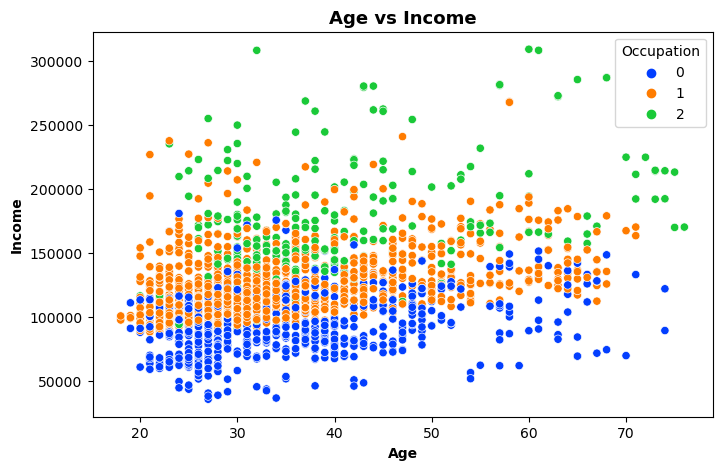

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Age', y = 'Income', data = cust_data, palette = "bright", hue = 'Occupation')
plt.title('Age vs Income', fontsize = 13, fontweight="bold")
plt.xlabel('Age', fontweight="bold")
plt.ylabel('Income', fontweight="bold");

In [29]:
scaler = StandardScaler()

cust_data_scaled = scaler.fit_transform(cust_data)

In [31]:
hierar_clust = linkage(cust_data_scaled, method='ward')

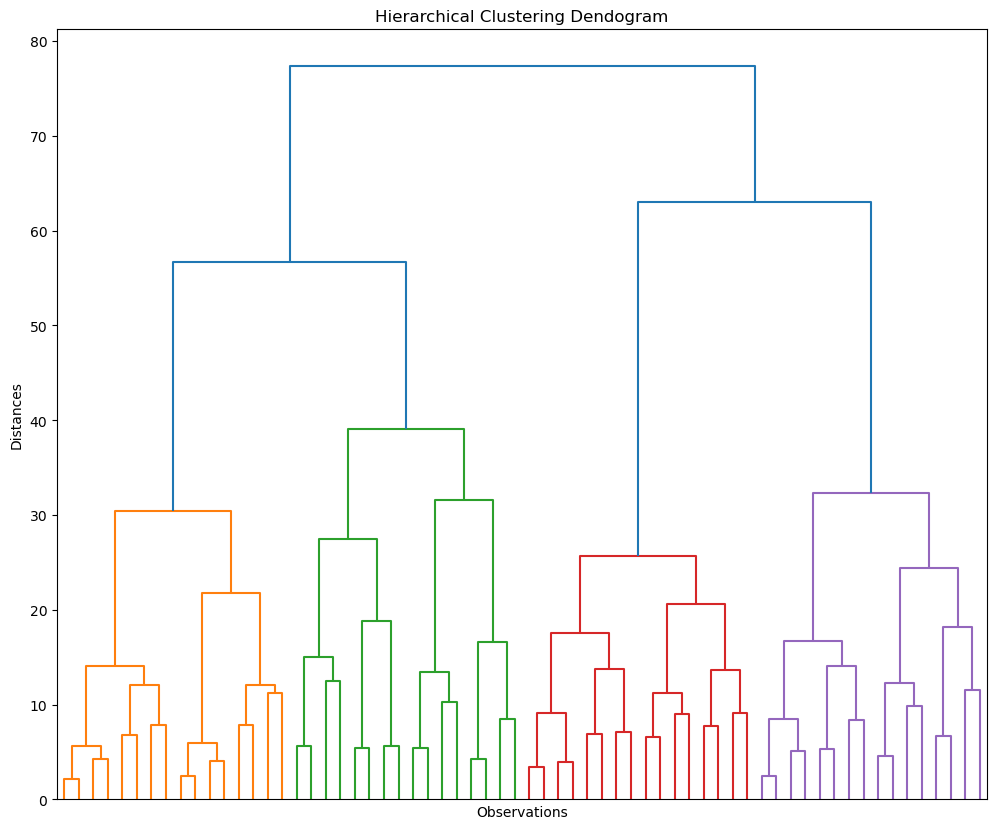

In [35]:
plt.figure(figsize=(12,10))
dendrogram(hierar_clust, 
          show_leaf_counts=False,
          no_labels=True,
          truncate_mode = 'level',
           p = 5)
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distances');

In [39]:
# fitting K-Means clustering algorithm for multiple K values and storing the metric 'sum of squared distances'

wcss = []
k_values = range(1,13)

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=101, n_init=15)
    kmeans_model.fit(cust_data_scaled)
    wcss.append(kmeans_model.inertia_)

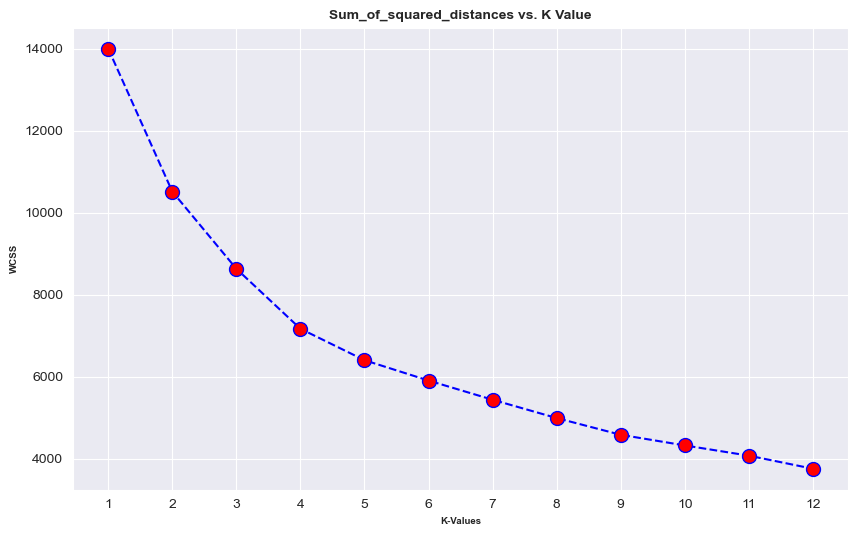

In [43]:
# plotting the k values versus the 'sum of squared distances'

sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.plot(k_values,wcss, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.xticks(k_values)

plt.title('Sum_of_squared_distances vs. K Value', fontsize = 10, fontweight="bold")
plt.xlabel('K-Values', fontweight="bold", fontsize = 7)
plt.ylabel('WCSS', fontweight="bold", fontsize = 7);

In [44]:
kmeans_model = KMeans(n_clusters=4, random_state=101, n_init=15)
kmeans_model.fit(cust_data_scaled)

KMeans(n_clusters=4, n_init=15, random_state=101)

In [46]:
segmented_data = cust_data.copy(deep = True)
segmented_data.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0


In [47]:
segmented_data['Cluster_KMeans'] = kmeans_model.labels_

In [49]:
segment_analysis = segmented_data.groupby('Cluster_KMeans').mean()
segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster_KMeans,,,,,,,
0,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [50]:
segment_analysis['No_of_Obs_Cluster'] = segmented_data[['Cluster_KMeans', 'Sex']].groupby('Cluster_KMeans').count()
segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No_of_Obs_Cluster
Cluster_KMeans,,,,,,,,
0,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263


In [51]:
segment_analysis['Cluster_proportion'] = segment_analysis['No_of_Obs_Cluster'] / segment_analysis['No_of_Obs_Cluster'].sum()
segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No_of_Obs_Cluster,Cluster_proportion
Cluster_KMeans,,,,,,,,,
0,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [52]:
segment_analysis.rename({0: 'Well-Off', 1:'Middle-Class', 2: 'Standard-Segment', 3:'Career-Focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No_of_Obs_Cluster,Cluster_proportion
Cluster_KMeans,,,,,,,,,
Well-Off,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Middle-Class,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Standard-Segment,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Career-Focused,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [53]:
segmented_data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster_KMeans
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,3
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,2
100000004,0,0,45,1,171565,1,1,0
100000005,0,0,53,1,149031,1,1,0


In [54]:
segmented_data['Cluster_labels'] = segmented_data['Cluster_KMeans'].map({0: 'Well-Off', 
                                                                         1:'Middle-Class', 
                                                                         2: 'Standard-Segment', 
                                                                         3:'Career-Focused'})

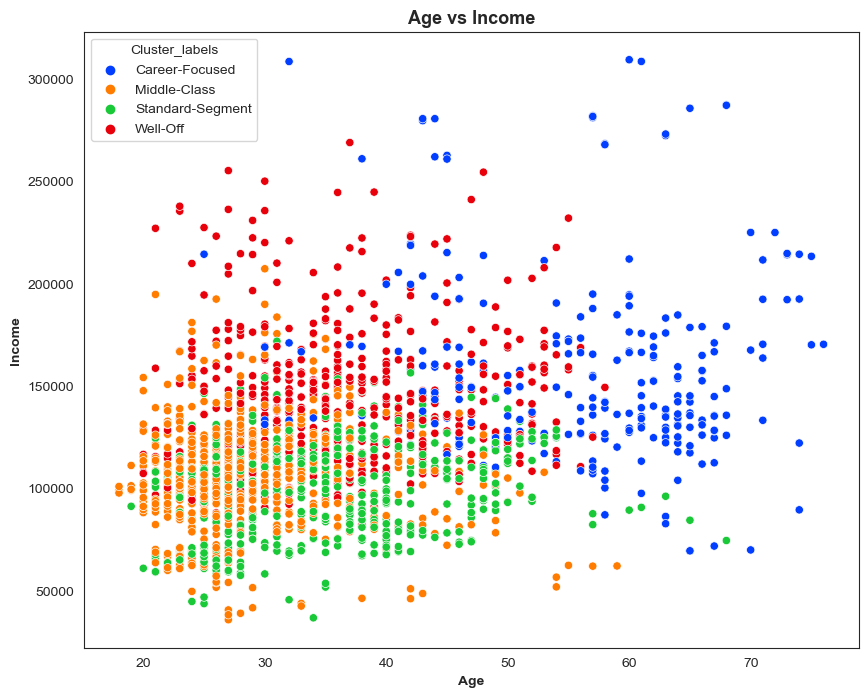

In [56]:
sns.set_style('white')
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Age', y = 'Income', data = segmented_data, palette = "bright", hue = 'Cluster_labels')
plt.title('Segmented Customers', fontsize = 13, fontweight="bold")
plt.xlabel('Age', fontweight="bold")
plt.ylabel('Income', fontweight="bold");

In [65]:
cust_data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [59]:
cust_data.shape

(2000, 7)

In [66]:
pca = PCA()
pca.fit(cust_data_scaled)

PCA()

In [67]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [69]:
pca.explained_variance_ratio_.cumsum()

array([0.35696328, 0.61947251, 0.80768365, 0.88326115, 0.94042627,
       0.97997421, 1.        ])

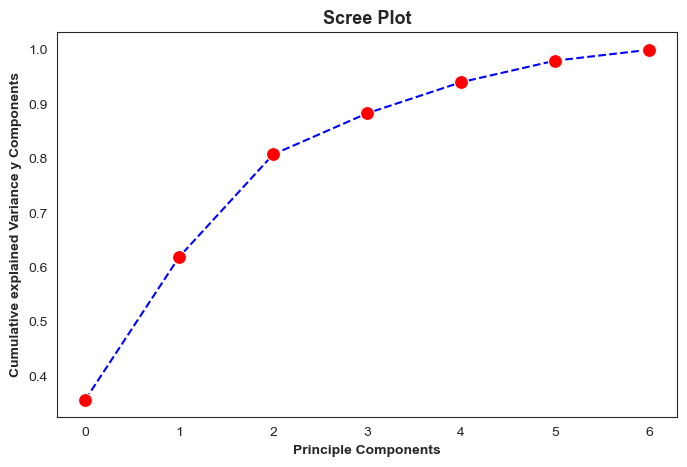

In [72]:
plt.figure(figsize=(8,5))

sns.lineplot(x = range(cust_data.shape[1]), 
             y = pca.explained_variance_ratio_.cumsum(), 
             color='blue', 
             linestyle='dashed', 
             marker='o',
             markerfacecolor='red', 
             markersize=10)

plt.title('Scree Plot', fontsize = 13, fontweight="bold")
plt.xlabel('Principle Components', fontweight="bold")
plt.ylabel('Cumulative explained Variance y Components', fontweight="bold");

In [73]:
pca = PCA(n_components=5)
pca.fit(cust_data_scaled)

PCA(n_components=5)

In [74]:
pca.components_   # 5x7 array, as 5 components we selected and it has 7 features originally

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455],
       [-0.70718503,  0.49755981, -0.1351596 ,  0.10659686,  0.07889011,
         0.13394187, -0.44556535]])

In [ ]:
# loading: correlation between original variable and a component

In [76]:
labels = [ 'Component_'+str(i) for i in range(pca.components_.shape[0])]
labels

['Component_0', 'Component_1', 'Component_2', 'Component_3', 'Component_4']

In [79]:
pca_df = pd.DataFrame(data = pca.components_, columns=cust_data.columns, index = labels)
pca_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component_0,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component_1,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component_2,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685
Component_3,-0.315601,0.280454,-0.009506,0.181476,-0.482600,-0.281690,0.690265
Component_4,-0.707185,0.497560,-0.135160,0.106597,0.078890,0.133942,-0.445565


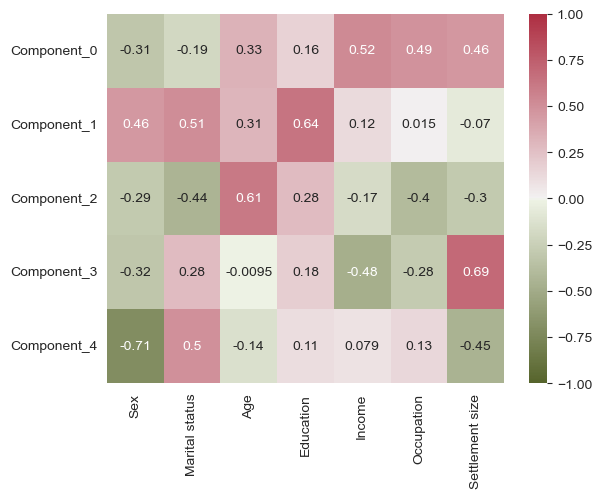

In [82]:
sns.heatmap(pca_df, 
           vmax=1,
           vmin=-1,
           cmap = cmap,
           annot = True);

In [84]:
scores_pca = pca.transform(cust_data_scaled)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ,  1.21779432, -0.67717594],
       [ 0.34493528,  0.59814564, -2.21160279,  0.54838542, -0.70626882],
       [-0.65106267, -0.68009318,  2.2804186 ,  0.12067518,  0.16648038],
       ...,
       [-1.45229829, -2.23593665,  0.89657125, -0.13177412,  0.19053628],
       [-2.24145254,  0.62710847, -0.53045631, -0.04260559,  0.04852603],
       [-1.86688505, -2.45467234,  0.66262172,  0.10089556,  0.22251297]])

In [85]:
# fitting K-Means clustering algorithm for multiple K values and storing the metric 'sum of squared distances'

wcss_pca = []
k_values = range(1,13)

for k in k_values:
    kmeans_model_pca = KMeans(n_clusters=k, random_state=101, n_init=15)
    kmeans_model_pca.fit(scores_pca)
    wcss_pca.append(kmeans_model_pca.inertia_)

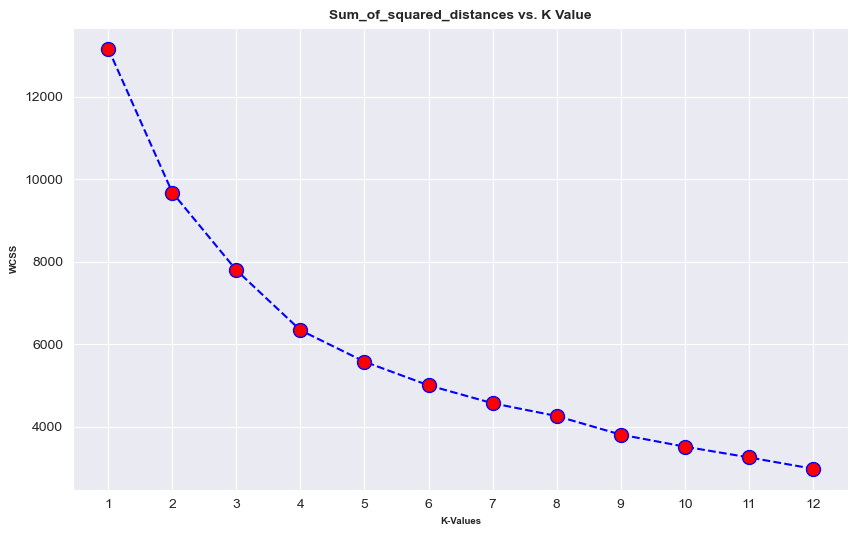

In [86]:
# plotting the k values versus the 'sum of squared distances'

sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.plot(k_values,wcss_pca, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.xticks(k_values)

plt.title('Sum_of_squared_distances vs. K Value (PCA Data)', fontsize = 10, fontweight="bold")
plt.xlabel('K-Values', fontweight="bold", fontsize = 7)
plt.ylabel('WCSS', fontweight="bold", fontsize = 7);

In [87]:
kmeans_model_pca = KMeans(n_clusters=4, random_state=101, n_init=15)
kmeans_model_pca.fit(scores_pca)

KMeans(n_clusters=4, n_init=15, random_state=101)

In [90]:
segmented_data_pca = pd.concat([cust_data.reset_index(drop=True), pd.DataFrame(scores_pca, columns=labels)], axis = 1)
segmented_data_pca.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component_0,Component_1,Component_2,Component_3,Component_4
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,-0.677176
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,-0.706269
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,0.166480
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,0.044448
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,-0.094499


In [91]:
segmented_data_pca['Cluster_labels'] = kmeans_model_pca.labels_
segmented_data_pca.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component_0,Component_1,Component_2,Component_3,Component_4,Cluster_labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,-0.677176,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,-0.706269,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,0.166480,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,0.044448,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,-0.094499,3


In [94]:
segment_analysis_pca = segmented_data_pca.groupby('Cluster_labels').mean()
segment_analysis_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component_0,Component_1,Component_2,Component_3,Component_4
Cluster_labels,,,,,,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,-0.924811,-0.936734,0.981268,-0.375016,-0.140050
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,-1.154330,0.698594,-0.733040,0.045677,0.125264
2,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869,0.033052
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,1.389408,-1.046391,-0.276923,0.203331,-0.056972


In [97]:
segment_analysis_pca.rename(index = {0:'Lower-Middle-Class', 1: 'Career-Focused', 2: 'Well-Off', 3:'Upper-Middle-Class'}, 
                            inplace = True)
segment_analysis_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component_0,Component_1,Component_2,Component_3,Component_4
Cluster_labels,,,,,,,,,,,,
Lower-Middle-Class,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,-0.924811,-0.936734,0.981268,-0.375016,-0.140050
Career-Focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,-1.154330,0.698594,-0.733040,0.045677,0.125264
Well-Off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869,0.033052
Upper-Middle-Class,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,1.389408,-1.046391,-0.276923,0.203331,-0.056972


In [98]:
segmented_data_pca['Cluster_categ'] = segmented_data_pca['Cluster_labels'].map({0:'Lower-Middle-Class', 
                                                                                1: 'Career-Focused', 
                                                                                2: 'Well-Off', 
                                                                                3:'Upper-Middle-Class'})
segmented_data_pca.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component_0,Component_1,Component_2,Component_3,Component_4,Cluster_labels,Cluster_categ
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,-0.677176,2,Well-Off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,-0.706269,1,Career-Focused
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,0.166480,0,Lower-Middle-Class
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,0.044448,3,Upper-Middle-Class
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,-0.094499,3,Upper-Middle-Class


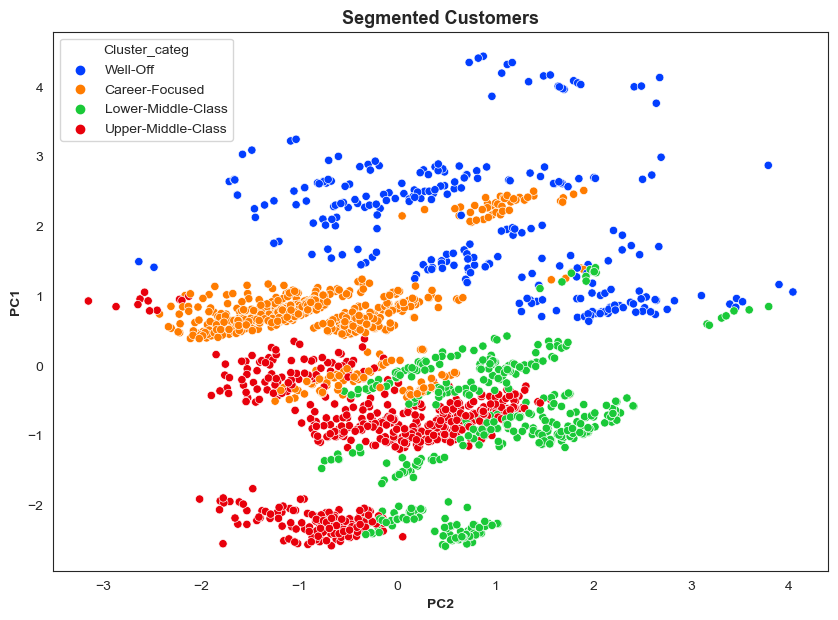

In [103]:
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'Component_2', y = 'Component_1', data = segmented_data_pca, palette = "bright", hue = 'Cluster_categ')
plt.title('Segmented Customers', fontsize = 13, fontweight="bold")
plt.xlabel('PC2', fontweight="bold")
plt.ylabel('PC1', fontweight="bold");

In [102]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_model_pca, open('kmeans_model_pca.pickle', 'wb'))